In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import re

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_colwidth', -1)

# Importing the .csv files - cleaning the tables

In [3]:
import glob
filenames = glob.glob("tabula-usda*.csv")

df_total_list=[]
df_animals_not_used_list=[]
df_animals_not_pain_no_drugs_list=[]
df_animals_with_pain_with_drugs_list=[]
df_animals_with_pain_no_drugs_list=[]

for filename in filenames:
    df=pd.read_csv(filename)
    df['filename'] = filename
    df_total=df.iloc[:52]
    df_animals_not_used=df.iloc[54:106]
    df_animals_not_pain_no_drugs=df.iloc[108:160]
    df_animals_with_pain_with_drugs=df.iloc[162:214]
    df_animals_with_pain_no_drugs=df.iloc[216:268]
    
    df_total_list.append(df_total)
    df_animals_not_used_list.append(df_animals_not_used)
    df_animals_not_pain_no_drugs_list.append(df_animals_not_pain_no_drugs)
    df_animals_with_pain_with_drugs_list.append(df_animals_with_pain_with_drugs)
    df_animals_with_pain_no_drugs_list.append(df_animals_with_pain_no_drugs)
    

# CONCAT THE FIRST DATA - CREATE ['YEAR'] COLUMN


In [4]:
df_total = pd.concat(df_total_list, sort=True, ignore_index=True)
df_animals_not_used = pd.concat(df_animals_not_used_list, sort=True, ignore_index=True)
df_animals_not_pain_no_drugs = pd.concat(df_animals_not_pain_no_drugs_list, sort=True, ignore_index=True)
df_animals_with_pain_with_drugs = pd.concat(df_animals_with_pain_with_drugs_list, sort=True, ignore_index=True)
df_animals_with_pain_no_drugs = pd.concat(df_animals_with_pain_no_drugs_list, sort=True, ignore_index=True)


In [5]:
df_animals_not_used

,All Other Covered Specie,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,Unnamed: 0,filename
0,426,0,6,0,190,0,0,0,0,0,0,622,AK,tabula-usda-annual-report-animal-usage-in-research-2008.csv
1,132,34,110,0,0,0,0,612,4,321,6,"1,219",AL,tabula-usda-annual-report-animal-usage-in-research-2008.csv
2,92,69,22,15,0,0,34,0,0,0,0,232,AR,tabula-usda-annual-report-animal-usage-in-research-2008.csv
3,144,8,26,0,0,0,38,1,12,32,3,264,AZ,tabula-usda-annual-report-animal-usage-in-research-2008.csv
4,"1,870",409,118,735,60,0,"6,009","4,473",45,"4,438",179,"18,336",CA,tabula-usda-annual-report-animal-usage-in-research-2008.csv
5,358,253,4,423,103,0,0,0,0,0,0,"1,141",CO,tabula-usda-annual-report-animal-usage-in-research-2008.csv
6,667,8,93,14,14,0,53,8,9,111,0,977,CT,tabula-usda-annual-report-animal-usage-in-research-2008.csv
7,"1,637",25,0,0,0,0,74,0,0,2,0,"1,738",DC,tabula-usda-annual-report-animal-usage-in-research-2008.csv
8,0,0,0,80,0,0,0,48,0,"4,148",0,"4,276",DE,tabula-usda-annual-report-animal-usage-in-research-2008.csv
9,643,0,6,0,51,0,"1,667",2,0,3,0,"2,372",FL,tabula-usda-annual-report-animal-usage-in-research-2008.csv


In [6]:
df_total['Year']=df_total.filename.str.extract(r"-(\d\d\d\d)[.]csv")
df_animals_with_pain_no_drugs['Year']=df_animals_with_pain_no_drugs.filename.str.extract(r"-(\d\d\d\d)[.]csv")

In [7]:
df_total

,All Other Covered Specie,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,Unnamed: 0,filename,Year
0,981,202,41,8,183,0,0,0,0,0,0,"1,415",AK,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
1,"1,542",281,"1,692",174,216,0,"1,338","1,155",897,"1,046",59,"8,400",AL,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
2,49,97,289,244,17,0,135,103,238,721,0,"1,893",AR,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
3,"2,615",257,553,207,17,0,46,52,498,334,40,"4,619",AZ,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
4,"10,550","1,567","2,899","25,119","6,253",0,"3,710","7,320","4,167","47,941","1,650","111,176",CA,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
5,"1,670",371,546,"4,402","1,926",0,0,228,743,469,658,"11,013",CO,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
6,"1,330",32,434,511,493,0,292,0,615,344,5,"4,056",CT,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
7,"11,941",70,24,384,373,0,269,33,"1,090",148,23,"14,355",DC,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
8,158,328,307,"4,083",570,0,0,385,70,"17,285",477,"23,663",DE,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
9,"3,014",354,332,504,496,0,481,774,972,460,194,"7,581",FL,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008


# Cleaning the 2016 data

In [8]:
# at_2016=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2016.csv')
# at_2016['Year']='2016'

# at_2016_animals_not_used=at_2016.iloc[:47]
# at_2016_animals_not_pain_no_drugs=at_2016.iloc[50:101]
# at_2016_animals_with_pain_with_drugs=at_2016.iloc[104:155]

# at_2016_animals_with_pain_no_drugs=pd.read_csv('2016-animal-wpnd.csv')
# at_2016_total=pd.read_csv('2016-animal-total.csv')
# at_2016_total

In [9]:
# at_2016_animals_with_pain_no_drugs['Year']='2016'
# at_2016_total['Year']='2016'

# at_2016_animals_with_pain_no_drugs=at_2016_animals_with_pain_no_drugs[['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Dogs',
#        'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep', 'Hamsters',
#        'Nonhuman\rPrimates', 'Guinea Pigs', 'Total','Year']]

# at_2016_total=at_2016_animals_with_pain_no_drugs[['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Dogs',
#        'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep', 'Hamsters',
#        'Nonhuman\rPrimates', 'Guinea Pigs', 'Total','Year']]


In [10]:
# at_2016_animals_with_pain_no_drugs.keys()

# Cleaning the 2015 data cause they were different

In [11]:
at_2015=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2015.csv')
at_2015['Year']='2015'

at_2015_animals_not_used=at_2015.iloc[:52]
at_2015_animals_not_pain_no_drugs=at_2015.iloc[54:106]
at_2015_animals_with_pain_with_drugs=at_2015.iloc[108:159]
at_2015_animals_with_pain_no_drugs=at_2015.iloc[162:213]
at_2015_total=at_2015.iloc[216:267]

# Cleaning the 2014 data cause they were different

In [12]:
at_2014=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2014.csv')
at_2014['Year']='2014'


at_2014_animals_not_used=at_2014.iloc[:52]
at_2014_animals_not_pain_no_drugs=at_2014.iloc[54:106]
at_2014_animals_with_pain_with_drugs=at_2014.iloc[108:159]
at_2014_animals_with_pain_no_drugs=at_2014.iloc[162:213]
at_2014_total=at_2014.iloc[216:267]

# Cleaning the 2013 data cause they were different

In [13]:
at_2013=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2013.csv')
at_2013['Year']='2013'

at_2013_animals_not_used=at_2013.iloc[:52]
at_2013_animals_not_pain_no_drugs=at_2013.iloc[54:106]
at_2013_animals_with_pain_with_drugs=at_2013.iloc[108:160]
at_2013_animals_with_pain_no_drugs=at_2013.iloc[162:214]
at_2013_total=at_2013.iloc[216:268]

# Cleaning the 2012 data cause they were different

In [14]:
at_2012=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2012.csv')
at_2012['Year']='2012'

at_2012_animals_not_used=at_2012.iloc[:52]
at_2012_animals_not_pain_no_drugs=at_2012.iloc[54:106]
at_2012_animals_with_pain_with_drugs=at_2012.iloc[108:160]
at_2012_animals_with_pain_no_drugs=at_2012.iloc[162:214]
at_2012_total=at_2012.iloc[216:268]

# Cleaning the 2011  data cause they were different

In [15]:
at_2011=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2011.csv')
at_2011['Year']='2011'

at_2011_animals_not_used=at_2011.iloc[:52]
at_2011_animals_not_pain_no_drugs=at_2011.iloc[54:106]
at_2011_animals_with_pain_with_drugs=at_2011.iloc[108:160]
at_2011_animals_with_pain_no_drugs=at_2011.iloc[162:214]
at_2011_total=at_2011.iloc[216:268]

# Cleaning the 2010  data cause they were different

In [16]:
at_2010=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2010.csv')
at_2010['Year']='2010'

at_2010_total=at_2010.iloc[:52]
at_2010_animals_with_pain_with_drugs=at_2010.iloc[54:106]
at_2010_animals_with_pain_no_drugs=at_2010.iloc[108:160]
at_2010_animals_not_pain_no_drugs=at_2010.iloc[162:214]
at_2010_animals_not_used=at_2010.iloc[216:268]


# Combining the different data with the rest

In [17]:
total_animals=pd.concat([df_total,at_2011_total,at_2010_total,at_2012_total,at_2013_total,at_2014_total,at_2015_total],sort=True, ignore_index=True)
animals_not_used=pd.concat([df_animals_not_used,at_2010_animals_not_used,at_2011_animals_not_used,at_2012_animals_not_used,at_2013_animals_not_used,at_2014_animals_not_used,at_2015_animals_not_used],sort=True, ignore_index=True)
total_animals_not_pain_no_drugs=pd.concat([df_animals_not_pain_no_drugs,at_2010_animals_not_pain_no_drugs,at_2011_animals_not_pain_no_drugs,at_2012_animals_not_pain_no_drugs,at_2013_animals_not_pain_no_drugs,at_2014_animals_not_pain_no_drugs,at_2015_animals_not_pain_no_drugs,at_2011_animals_not_pain_no_drugs],sort=True, ignore_index=True)
total_animals_with_pain_with_drugs=pd.concat([df_animals_with_pain_with_drugs,at_2010_animals_with_pain_with_drugs,at_2011_animals_with_pain_with_drugs,at_2012_animals_with_pain_with_drugs,at_2013_animals_with_pain_with_drugs,at_2014_animals_with_pain_with_drugs,at_2015_animals_with_pain_with_drugs],sort=True, ignore_index=True)
animals_with_pain_no_drugs=pd.concat([df_animals_with_pain_no_drugs,at_2010_animals_with_pain_no_drugs,at_2011_animals_with_pain_no_drugs,at_2012_animals_with_pain_no_drugs,at_2013_animals_with_pain_no_drugs,at_2014_animals_with_pain_no_drugs,at_2015_animals_with_pain_no_drugs],sort=True, ignore_index=True)

# CLEANING the Animals with pain no drugs

In [18]:
animals_with_pain_no_drugs['All Other\rCovered\rSpecie'].fillna(animals_with_pain_no_drugs['ALL OTHER\rCOVERED\rSPECIE'], inplace=True)
# animals_with_pain_no_drugs['All Other\rCovered\rSpecies'].fillna(animals_with_pain_no_drugs['All Other\rCovered\rSpecie'], inplace=True)
animals_with_pain_no_drugs.Cats.fillna(animals_with_pain_no_drugs.CATS, inplace=True)
animals_with_pain_no_drugs.Dogs.fillna(animals_with_pain_no_drugs.DOGS, inplace=True)
animals_with_pain_no_drugs['Guinea Pigs'].fillna(animals_with_pain_no_drugs['GUINEA\rPIGS'], inplace=True)
animals_with_pain_no_drugs.Hamsters.fillna(animals_with_pain_no_drugs.HAMSTERS, inplace=True)
animals_with_pain_no_drugs['Nonhuman\rPrimates'].fillna(animals_with_pain_no_drugs['NONHUMAN\rPRIMATES'], inplace=True)
animals_with_pain_no_drugs['Other Farm\rAnimals'].fillna(animals_with_pain_no_drugs['OTHER\rFARM\rANIMALS'], inplace=True)
animals_with_pain_no_drugs.Pig.fillna(animals_with_pain_no_drugs.PIG, inplace=True)
animals_with_pain_no_drugs.Rabbits.fillna(animals_with_pain_no_drugs.RABBITS, inplace=True)
animals_with_pain_no_drugs.Sheep.fillna(animals_with_pain_no_drugs.SHEEP, inplace=True)
animals_with_pain_no_drugs.rename(columns={
        'Unnamed: 0':'State'},inplace=True)

Get rid the double columns

In [19]:
animals_with_pain_no_drugs.drop(columns=['CATS','DOGS','GUINEA\rPIGS', 'HAMSTERS','NONHUMAN\rPRIMATES','OTHER\rFARM\rANIMALS','PIG','RABBITS','SHEEP','ALL OTHER\rCOVERED\rSPECIE','All Other\rCovered\rSpecie','filename','Unnamed: 12'], inplace=True)

In [20]:
animals_with_pain_no_drugs['date_year']=pd.to_datetime(animals_with_pain_no_drugs.Year, format='%Y')


In [21]:
animals_with_pain_no_drugs['Cats']=pd.to_numeric(animals_with_pain_no_drugs.Cats.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Dogs']=pd.to_numeric(animals_with_pain_no_drugs.Dogs.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Hamsters']=pd.to_numeric(animals_with_pain_no_drugs.Hamsters.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Guinea Pigs']=pd.to_numeric(animals_with_pain_no_drugs['Guinea Pigs'].str.replace(',',''), errors='coerce')
# animals_with_pain_no_drugs['All Other\rCovered\rSpecies']=pd.to_numeric(animals_with_pain_no_drugs['All Other\rCovered\rSpecies'].str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Marine\rMammals']=pd.to_numeric(animals_with_pain_no_drugs['Marine\rMammals'].str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Pig']=pd.to_numeric(animals_with_pain_no_drugs.Pig.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Rabbits']=pd.to_numeric(animals_with_pain_no_drugs.Rabbits.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Sheep']=pd.to_numeric(animals_with_pain_no_drugs.Sheep.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Total']=pd.to_numeric(animals_with_pain_no_drugs.Total.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Other Farm\rAnimals']=pd.to_numeric(animals_with_pain_no_drugs['Other Farm\rAnimals'].str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Nonhuman\rPrimates']=pd.to_numeric(animals_with_pain_no_drugs['Nonhuman\rPrimates'].str.replace(',',''), errors='coerce')



# Cleaning the total

In [22]:
total_animals['All Other\rCovered\rSpecie'].fillna(total_animals['ALL OTHER\rCOVERED\rSPECIE'], inplace=True)
# total_animals['All Other\rCovered\rSpecies'].fillna(total_animals['All Other\rCovered\rSpecie'], inplace=True)
total_animals.Cats.fillna(total_animals.CATS, inplace=True)
total_animals.Dogs.fillna(total_animals.DOGS, inplace=True)
total_animals['Guinea Pigs'].fillna(total_animals['GUINEA\rPIGS'], inplace=True)
total_animals.Hamsters.fillna(total_animals.HAMSTERS, inplace=True)
total_animals['Nonhuman\rPrimates'].fillna(total_animals['NONHUMAN\rPRIMATES'], inplace=True)
total_animals['Other Farm\rAnimals'].fillna(total_animals['OTHER\rFARM\rANIMALS'], inplace=True)
total_animals.Pig.fillna(total_animals.PIG, inplace=True)
total_animals.Rabbits.fillna(total_animals.RABBITS, inplace=True)
total_animals.Sheep.fillna(total_animals.SHEEP, inplace=True)
total_animals.rename(columns={
        'Unnamed: 0':'State'},inplace=True)

In [23]:
total_animals.drop(columns=['CATS','DOGS','GUINEA\rPIGS', 'HAMSTERS','NONHUMAN\rPRIMATES','OTHER\rFARM\rANIMALS','PIG','RABBITS','SHEEP','ALL OTHER\rCOVERED\rSPECIE','All Other\rCovered\rSpecie','filename'], inplace=True)

In [24]:
total_animals['date_year']=pd.to_datetime(total_animals.Year, format='%Y')


In [25]:
total_animals['Cats']=pd.to_numeric(total_animals.Cats.str.replace(',',''), errors='coerce')
total_animals['Dogs']=pd.to_numeric(total_animals.Dogs.str.replace(',',''), errors='coerce')
total_animals['Hamsters']=pd.to_numeric(total_animals.Hamsters.str.replace(',',''), errors='coerce')
total_animals['Guinea Pigs']=pd.to_numeric(total_animals['Guinea Pigs'].str.replace(',',''), errors='coerce')
# total_animals['All Other\rCovered\rSpecies']=pd.to_numeric(total_animals['All Other\rCovered\rSpecies'].str.replace(',',''), errors='coerce')
total_animals['Marine\rMammals']=pd.to_numeric(total_animals['Marine\rMammals'].str.replace(',',''), errors='coerce')
total_animals['Pig']=pd.to_numeric(total_animals.Pig.str.replace(',',''), errors='coerce')
total_animals['Rabbits']=pd.to_numeric(total_animals.Rabbits.str.replace(',',''), errors='coerce')
total_animals['Sheep']=pd.to_numeric(total_animals.Sheep.str.replace(',',''), errors='coerce')
total_animals['Total']=pd.to_numeric(total_animals.Total.str.replace(',',''), errors='coerce')
total_animals['Other Farm\rAnimals']=pd.to_numeric(total_animals['Other Farm\rAnimals'].str.replace(',',''), errors='coerce')


In [26]:
total_animals['Cats']=total_animals.Cats.astype(float)

# Cleaning Animals Not Used

In [27]:
animals_not_used['All Other\rCovered\rSpecie'].fillna(animals_not_used['ALL OTHER\rCOVERED\rSPECIE'], inplace=True)
# animals_not_used['All Other\rCovered\rSpecies'].fillna(animals_not_used['All Other\rCovered\rSpecie'], inplace=True)
animals_not_used.Cats.fillna(animals_not_used.CATS, inplace=True)
animals_not_used.Dogs.fillna(animals_not_used.DOGS, inplace=True)
animals_not_used['Guinea Pigs'].fillna(animals_not_used['GUINEA\rPIGS'], inplace=True)
animals_not_used.Hamsters.fillna(animals_not_used.HAMSTERS, inplace=True)
animals_not_used['Nonhuman\rPrimates'].fillna(animals_not_used['NONHUMAN\rPRIMATES'], inplace=True)
animals_not_used['Other Farm\rAnimals'].fillna(animals_not_used['OTHER\rFARM\rANIMALS'], inplace=True)
animals_not_used.Pig.fillna(animals_not_used.PIG, inplace=True)
animals_not_used.Rabbits.fillna(animals_not_used.RABBITS, inplace=True)
animals_not_used.Sheep.fillna(animals_not_used.SHEEP, inplace=True)
animals_not_used.rename(columns={
        'Unnamed: 0':'State'},inplace=True)

In [28]:
animals_not_used['date_year']=pd.to_datetime(animals_not_used.Year, format='%Y')


In [29]:
animals_not_used['Cats']=pd.to_numeric(animals_not_used.Cats.str.replace(',',''), errors='coerce')
animals_not_used['Dogs']=pd.to_numeric(animals_not_used.Dogs.str.replace(',',''), errors='coerce')
animals_not_used['Hamsters']=pd.to_numeric(animals_not_used.Hamsters.str.replace(',',''), errors='coerce')
animals_not_used['Guinea Pigs']=pd.to_numeric(animals_not_used['Guinea Pigs'].str.replace(',',''), errors='coerce')
# animals_not_used['All Other\rCovered\rSpecies']=pd.to_numeric(animals_not_used['All Other\rCovered\rSpecies'].str.replace(',',''), errors='coerce')
animals_not_used['Marine\rMammals']=pd.to_numeric(animals_not_used['Marine\rMammals'].str.replace(',',''), errors='coerce')
animals_not_used['Pig']=pd.to_numeric(animals_not_used.Pig.str.replace(',',''), errors='coerce')
animals_not_used['Rabbits']=pd.to_numeric(animals_not_used.Rabbits.str.replace(',',''), errors='coerce')
animals_not_used['Sheep']=pd.to_numeric(animals_not_used.Sheep.str.replace(',',''), errors='coerce')
animals_not_used['Total']=pd.to_numeric(animals_not_used.Total.str.replace(',',''), errors='coerce')
animals_not_used['Other Farm\rAnimals']=pd.to_numeric(animals_not_used['Other Farm\rAnimals'].str.replace(',',''), errors='coerce')

In [30]:
animals_not_used.drop(columns=['CATS','DOGS','GUINEA\rPIGS', 'HAMSTERS','NONHUMAN\rPRIMATES','OTHER\rFARM\rANIMALS','PIG','RABBITS','SHEEP','ALL OTHER\rCOVERED\rSPECIE','All Other\rCovered\rSpecie','filename'], inplace=True)


In [31]:
animals_not_used

,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,State,Unnamed: 12,Year,date_year
0,0,6,0,190,0.0,0,0,0,0,0,622,AK,NaN,NaN,NaT
1,34,110,0,0,0.0,0,612,4,321,6,1219,AL,NaN,NaN,NaT
2,69,22,15,0,0.0,34,0,0,0,0,232,AR,NaN,NaN,NaT
3,8,26,0,0,0.0,38,1,12,32,3,264,AZ,NaN,NaN,NaT
4,409,118,735,60,0.0,"6,009",4473,45,4438,179,18336,CA,NaN,NaN,NaT
5,253,4,423,103,0.0,0,0,0,0,0,1141,CO,NaN,NaN,NaT
6,8,93,14,14,0.0,53,8,9,111,0,977,CT,NaN,NaN,NaT
7,25,0,0,0,0.0,74,0,0,2,0,1738,DC,NaN,NaN,NaT
8,0,0,80,0,0.0,0,48,0,4148,0,4276,DE,NaN,NaN,NaT
9,0,6,0,51,0.0,"1,667",2,0,3,0,2372,FL,NaN,NaN,NaT


# Saving them to CSV

In [32]:
total_animals.to_csv('total_animals.csv', index=False)

In [33]:
animals_with_pain_no_drugs.to_csv('awpnd.csv', index=False)

# GRAPHS

In [34]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [35]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family'         : 'arial',
    'font.style'          : 'normal',
    'font.variant'        : 'normal',
    'font.weight'         : 'light',
    'font.stretch'        : 'normal',
  'lines.linewidth': 2,
  'lines.solid_capstyle': 'butt',
  'legend.fancybox': True,

  'axes.prop_cycle': cycler('color', ['#00485C', '#EC8A6A','#04A5D3', '#5F8696', '#5FBD96', '#0074D9']),
  'axes.facecolor': '#D5E3E9',
  'axes.labelsize': 8,
  'axes.axisbelow': True,
  'axes.grid': True,
  'axes.edgecolor': 'Black',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
  'patch.edgecolor': 'black',
  'patch.linewidth': 0.5,
  'svg.fonttype': 'path',
  'grid.linestyle': '-',
  'grid.linewidth': 1.0,
  'grid.color': 'white',
  'xtick.major.size': 4,
  'xtick.minor.size': 4,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
  'font.size': 10.0,
  'savefig.edgecolor': '#D5E3E9',
  'savefig.facecolor': '#D5E3E9',
  'figure.subplot.left': 0.05,
  'figure.subplot.right': 0.95,
  'figure.subplot.bottom': 0.07,
  'figure.facecolor': '#D5E3E9',
  'legend.fancybox': True,
    
})

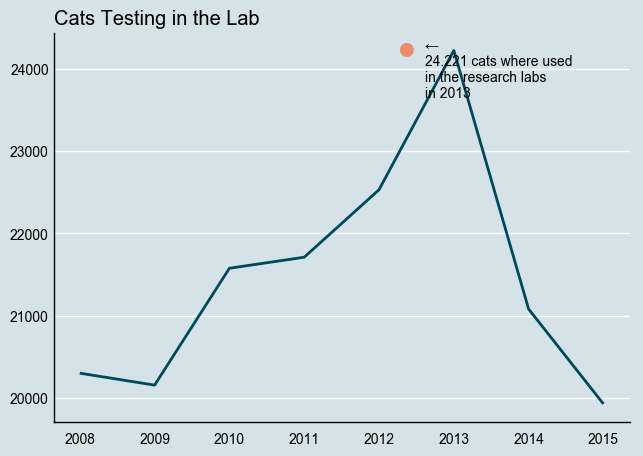

In [36]:
ax=total_animals.groupby('date_year').Cats.sum().plot()


ax.set_title('Cats Testing in the Lab', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it

fig=plt.gca
plt.gcf().text(0.63,0.745,'←\n24.221 cats where used\nin the research labs\nin 2013', ha='left',fontsize=10)

fig=plt.gca
plt.gcf().text(0.587,0.804,'•', ha='left',fontsize=40,color='#EC8A6A')

plt.savefig("cats.png")
plt.show()

In [37]:
total_animals[total_animals.Year=='2013'].Cats.sum()

24221.0

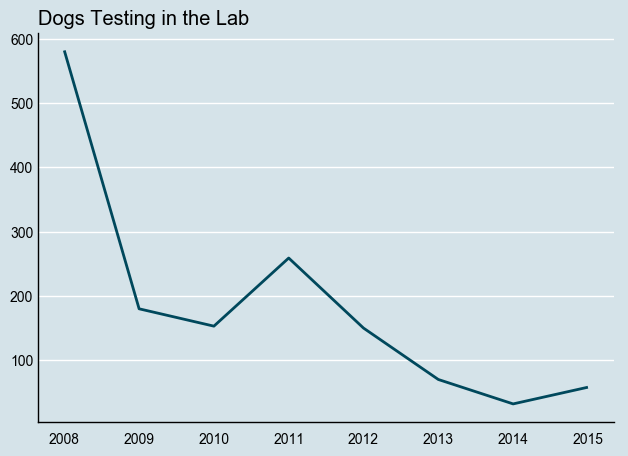

In [38]:
ax=animals_with_pain_no_drugs.groupby('date_year').Cats.sum().plot()


ax.set_title('Dogs Testing in the Lab', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("dogs.png")
plt.show()

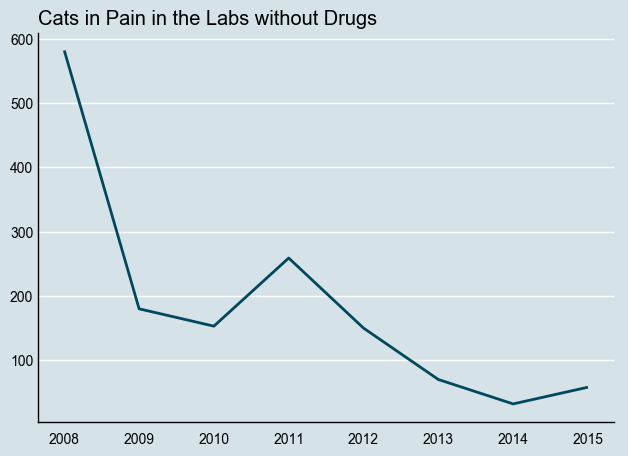

In [39]:
ax=animals_with_pain_no_drugs.groupby('date_year').Cats.sum().plot()

ax.set_title('Cats in Pain in the Labs without Drugs', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("cats_wpain.png")
plt.show()

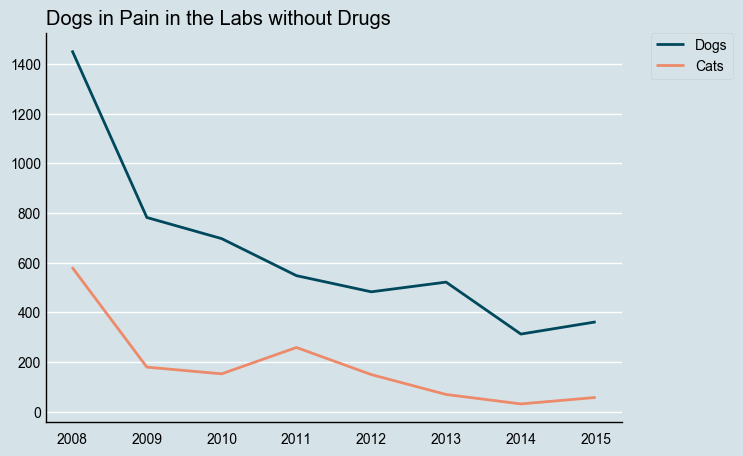

In [40]:
ax=animals_with_pain_no_drugs.groupby('date_year').Dogs.sum().plot()
ax=animals_with_pain_no_drugs.groupby('date_year').Cats.sum().plot(ax=ax)


ax.set_title('Dogs in Pain in the Labs without Drugs', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dogs&cats_wpain.png")
plt.show()

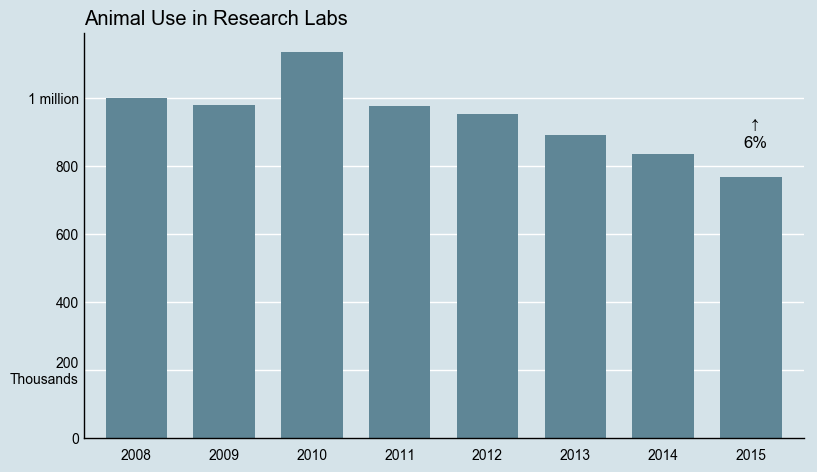

In [41]:
ax=total_animals.groupby('date_year').Total.sum().plot(kind='bar',rot=0,figsize=(8,5), width=0.7,color=['#5F8696','#5F8696','#5F8696','#5F8696','#5F8696','#5F8696','#5F8696','#5F8696','#EC8A6A'])

ax.set_title('Animal Use in Research Labs', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)



ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)
ax.set_xticklabels([2008, 2009, 2010,2011,2012,2013,2014,2015,2016])
ax.set_yticklabels(['0', '200\nThousands', '400','600','800','1 million'], ha='right')

fig=plt.gca
plt.gcf().text(0.89,0.65,'↑\n6%', ha='center',fontsize=12, color='black')


# then we save it
plt.savefig("total.png")
plt.show()

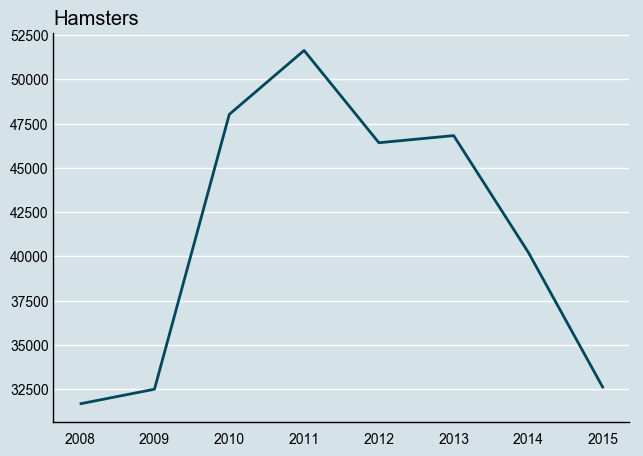

In [42]:
ax=animals_with_pain_no_drugs.groupby('date_year').Hamsters.sum().plot()

ax.set_title('Hamsters', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)



ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)
#ax.set_xticklabels([2008, 2009, 2010,2011,2012,2013,2014,2015,2016])
#ax.set_yticklabels(['0', '200\nThousands', '400','600','800','1 million'], ha='right')



# then we save it
plt.savefig("hamsterswpnd.png")
plt.show()

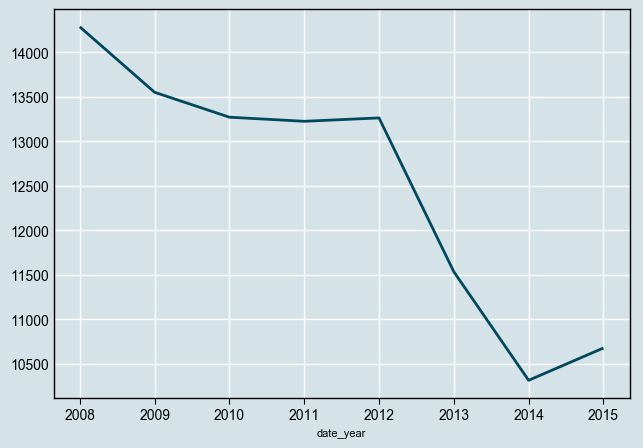

In [43]:
total_animals.groupby('date_year').Sheep.sum().plot()
plt.show()

In [44]:
total_animals[total_animals.Year=='2016'].Sheep

Series([], Name: Sheep, dtype: int64)

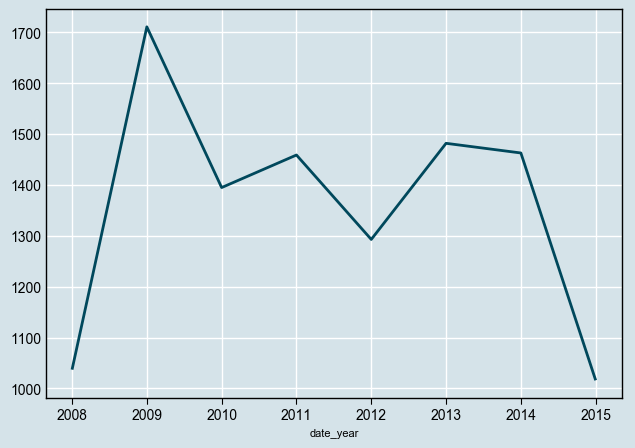

In [45]:
animals_with_pain_no_drugs.groupby('date_year')['Nonhuman\rPrimates'].sum().plot()
plt.show()

In [46]:
animals_with_pain_no_drugs['Nonhuman\rPrimates']

0      0  
1      15 
2      0  
3      0  
4      40 
5      0  
6      13 
7      4  
8      0  
9      4  
10     22 
11     0  
12     0  
13     0  
14     6  
15     3  
16     0  
17     0  
18     9  
19     16 
20     330
21     0  
22     42 
23     0  
24     0  
25     0  
26     0  
27     13 
28     0  
29     0  
30     0  
31     92 
32     187
33     0  
34     11 
35     142
36     0  
37     0  
38     46 
39     0  
40     0  
41     0  
42     0  
43     0  
44     26 
45     0  
46     16 
47     0  
48     0  
49     0  
50     0  
51     0  
52     0  
53     76 
54     0  
55     0  
56     59 
57     12 
58     34 
59     0  
60     0  
61     2  
62     10 
63     0  
64     0  
65     0  
66     0  
67     0  
68     16 
69     0  
70     23 
71     13 
72     570
73     0  
74     82 
75     0  
76     0  
77     0  
78     0  
79     14 
80     0  
81     0  
82     0  
83     133
84     155
85     0  
86     13 
87     425
88     0  
89     0  
90     58 

In [47]:
animals_not_used

,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,State,Unnamed: 12,Year,date_year
0,0,6,0,190,0.0,0,0,0,0,0,622,AK,NaN,NaN,NaT
1,34,110,0,0,0.0,0,612,4,321,6,1219,AL,NaN,NaN,NaT
2,69,22,15,0,0.0,34,0,0,0,0,232,AR,NaN,NaN,NaT
3,8,26,0,0,0.0,38,1,12,32,3,264,AZ,NaN,NaN,NaT
4,409,118,735,60,0.0,"6,009",4473,45,4438,179,18336,CA,NaN,NaN,NaT
5,253,4,423,103,0.0,0,0,0,0,0,1141,CO,NaN,NaN,NaT
6,8,93,14,14,0.0,53,8,9,111,0,977,CT,NaN,NaN,NaT
7,25,0,0,0,0.0,74,0,0,2,0,1738,DC,NaN,NaN,NaT
8,0,0,80,0,0.0,0,48,0,4148,0,4276,DE,NaN,NaN,NaT
9,0,6,0,51,0.0,"1,667",2,0,3,0,2372,FL,NaN,NaN,NaT


In [48]:
animals_with_pain_no_drugs.keys()

Index(['Cats', 'Dogs', 'Guinea Pigs', 'Hamsters', 'Marine\rMammals',
       'Nonhuman\rPrimates', 'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep',
       'Total', 'State', 'Year', 'date_year'],
      dtype='object')